<a href="https://colab.research.google.com/github/Talizg03/weather/blob/main/30%2C1%2C25_isolationforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import pandas as pd


df = pd.read_csv("Train.csv")
#print(df.head())
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3,2004,68,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3,1996,4640,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3,2001,2838,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3,2001,3486,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3,2007,722,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21269 entries, 0 to 21268
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   SalesID                   21269 non-null  int64 
 1   SalePrice                 21269 non-null  int64 
 2   MachineID                 21269 non-null  int64 
 3   ModelID                   21269 non-null  int64 
 4   datasource                21269 non-null  int64 
 5   auctioneerID              21269 non-null  int64 
 6   YearMade                  21269 non-null  int64 
 7   MachineHoursCurrentMeter  21269 non-null  int64 
 8   UsageBand                 18672 non-null  object
 9   saledate                  21269 non-null  object
 10  fiModelDesc               21269 non-null  object
 11  fiBaseModel               21269 non-null  object
 12  fiSecondaryDesc           14144 non-null  object
 13  fiModelSeries             3431 non-null   object
 14  fiModelDescriptor     

In [5]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def train_model(X, y):
    # Preprocess the features (convert categorical columns to category codes)
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = X[col].astype('category')
        if X[col].dtype == 'category':
            X[col] = X[col].cat.codes

    # Return processed X and y
    return X, y



# Randomly sample half of the rows from the dataset
df_half_random = df.sample(frac=0.5, random_state=42)

# Separate features (X) and target (y) from the sampled DataFrame
X_half_random = df_half_random.drop(columns=['SalePrice', 'Steering_Controls', 'Differential_Type',
                                              'Travel_Controls', 'Blade_Type', 'Backhoe_Mounting',
                                              'Grouser_Type', 'auctioneerID', 'MachineHoursCurrentMeter'])  # Features
y_half_random = df_half_random['SalePrice']  # Target

# Preprocess the features (convert categorical columns to category codes)
X_half_random, y_half_random = train_model(X_half_random, y_half_random)

# Split the sampled half into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_half_random, y_half_random, test_size=0.2, random_state=42)

# Train the RandomForestRegressor model on the processed data
model = RandomForestRegressor(random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate model performance using RMSE
train_rmse = mean_squared_error(y_train, y_train_pred) ** 0.5
test_rmse = mean_squared_error(y_test, y_test_pred) ** 0.5

# Print RMSE results
print("RMSE Baseline accuracy:", y_test.std())  # RMSE Baseline accuracy
print(f"Train: Root Mean Squared Error (RMSE): {train_rmse}")
print(f"Test: Root Mean Squared Error (RMSE): {test_rmse}")

# Evaluate the model (example: calculating the R^2 score)
print("Training R^2 Score:", model.score(X_train, y_train))
print("Testing R^2 Score:", model.score(X_test, y_test))


RMSE Baseline accuracy: 24994.808900032604
Train: Root Mean Squared Error (RMSE): 3790.768808084792
Test: Root Mean Squared Error (RMSE): 9918.799134740451
Training R^2 Score: 0.9753261356738567
Testing R^2 Score: 0.8424484140201571


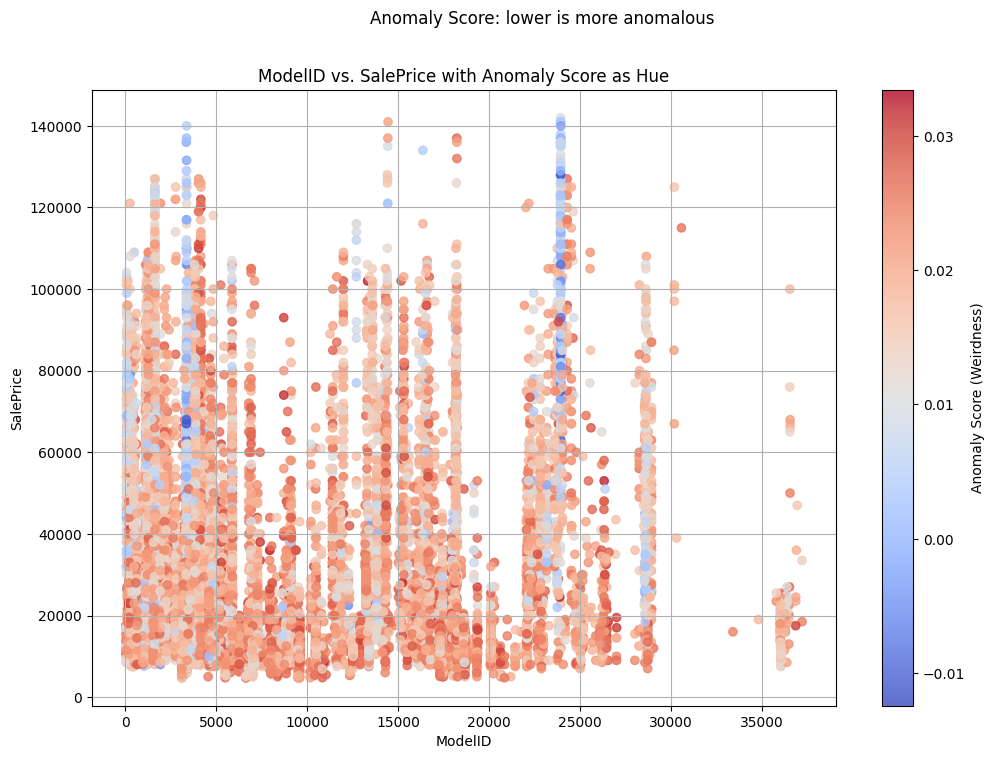

In [6]:

import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Drop the 'price' column for training and handle categorical variables
X = pd.get_dummies(df.drop(columns=['SalePrice', 'Steering_Controls', 'Differential_Type',
                                              'Travel_Controls', 'Blade_Type', 'Backhoe_Mounting',
                                              'Grouser_Type', 'auctioneerID', 'MachineHoursCurrentMeter']), drop_first=True)
y = df['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso_forest.fit(X_train)

# Predict anomaly scores and labels on a copy of X_test
X_test_copy = X_test.copy()
df['anomaly_score'] = iso_forest.decision_function(X)  # Quantitative weirdness
df['anomaly'] = iso_forest.predict(X)  # Binary anomaly label
df['anomaly_label'] = df['anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# Plot carat vs. price with hue as anomaly score (quantitative weirdness)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df['ModelID'], df['SalePrice'], c=df['anomaly_score'], cmap='coolwarm',
    # edgecolor='k',
    alpha=0.8
)
plt.colorbar(scatter, label='Anomaly Score (Weirdness)')
plt.title('ModelID vs. SalePrice with Anomaly Score as Hue')
plt.suptitle('Anomaly Score: lower is more anomalous')
plt.xlabel('ModelID')
plt.ylabel('SalePrice')
plt.grid(True)
plt.show()


In [8]:
df.sort_values("anomaly_score").sample(20)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,anomaly_score,anomaly,anomaly_label
817,1141967,57000,1044738,28254,121,3,2006,2204,Medium,11/11/2010 0:00,...,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,0.018342,1,Normal
8078,1166472,12250,1061496,21428,121,3,2002,463,Low,5/20/2004 0:00,...,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,0.024326,1,Normal
2707,1148310,47000,10442,3824,121,3,1999,26281,High,5/26/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,Limited Slip,Conventional,0.011634,1,Normal
1745,1145082,13500,1053498,15448,121,3,1999,3787,Low,6/25/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,0.018686,1,Normal
15842,1191808,14000,883548,3433,121,3,2005,0,NaN,6/11/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012102,1,Normal
13813,1184574,19500,1008578,9055,121,3,1000,0,NaN,12/11/2008 0:00,...,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,0.023072,1,Normal
14422,1186575,29000,1069033,11865,121,3,1999,9891,Medium,1/29/2009 0:00,...,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,0.017361,1,Normal
20281,1209689,65000,318911,23162,121,3,2007,4376,High,1/27/2011 0:00,...,Yes,Double,NaN,NaN,NaN,NaN,NaN,0.015089,1,Normal
18950,1204707,36000,1014217,9358,121,3,1000,1657,Low,7/29/2010 0:00,...,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN,0.028736,1,Normal
20104,1208993,9000,1016579,515,121,3,1999,4491,Low,12/9/2010 0:00,...,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,0.020945,1,Normal
